<a href="https://colab.research.google.com/github/jrTanvirHasan27/Railway-Obstacle-Detections/blob/main/VGG19_Train_Obstacle_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

In [ ]:
!unzip "/content/drive/MyDrive/8th Semester/Research/Augmented Dataset.zip" -d "/content/Dataset/"

In [ ]:
!unzip "/content/drive/MyDrive/8th Semester/Research/Augmented- Test.zip" -d "/content/Dataset/"

In [4]:
train_path = '/content/Dataset/Augmented Dataset'
test_path = '/content/Dataset/Augmented- Test/Test'
val_path = '/content/Dataset/Augmented- Test/Validation'

Obstacle


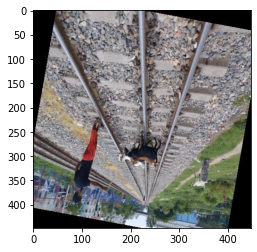

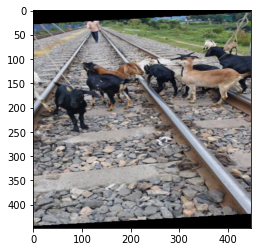

Empty Track


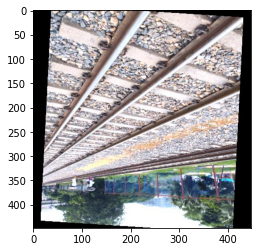

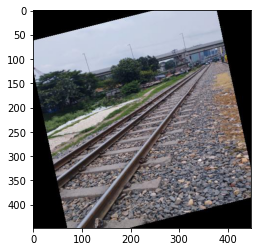

In [5]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [6]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [7]:
size = (320,320)

train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [8]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [9]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [10]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 3192 images belonging to 2 classes.
Found 1980 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.


In [11]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [12]:
train_class.class_indices

{'Empty Track': 0, 'Obstacle': 1}

In [13]:
y_train.shape,y_test.shape,y_val.shape

((3192,), (1980,), (1050,))

In [14]:
vgg = VGG19(input_shape = (320, 320, 3), weights = 'imagenet', include_top = False)

80150528/80134624 [==============================] - 0s 0us/step


In [15]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 320, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 320, 320, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 320, 320, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 160, 160, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 160, 160, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 160, 160, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 80, 80, 128)       0     

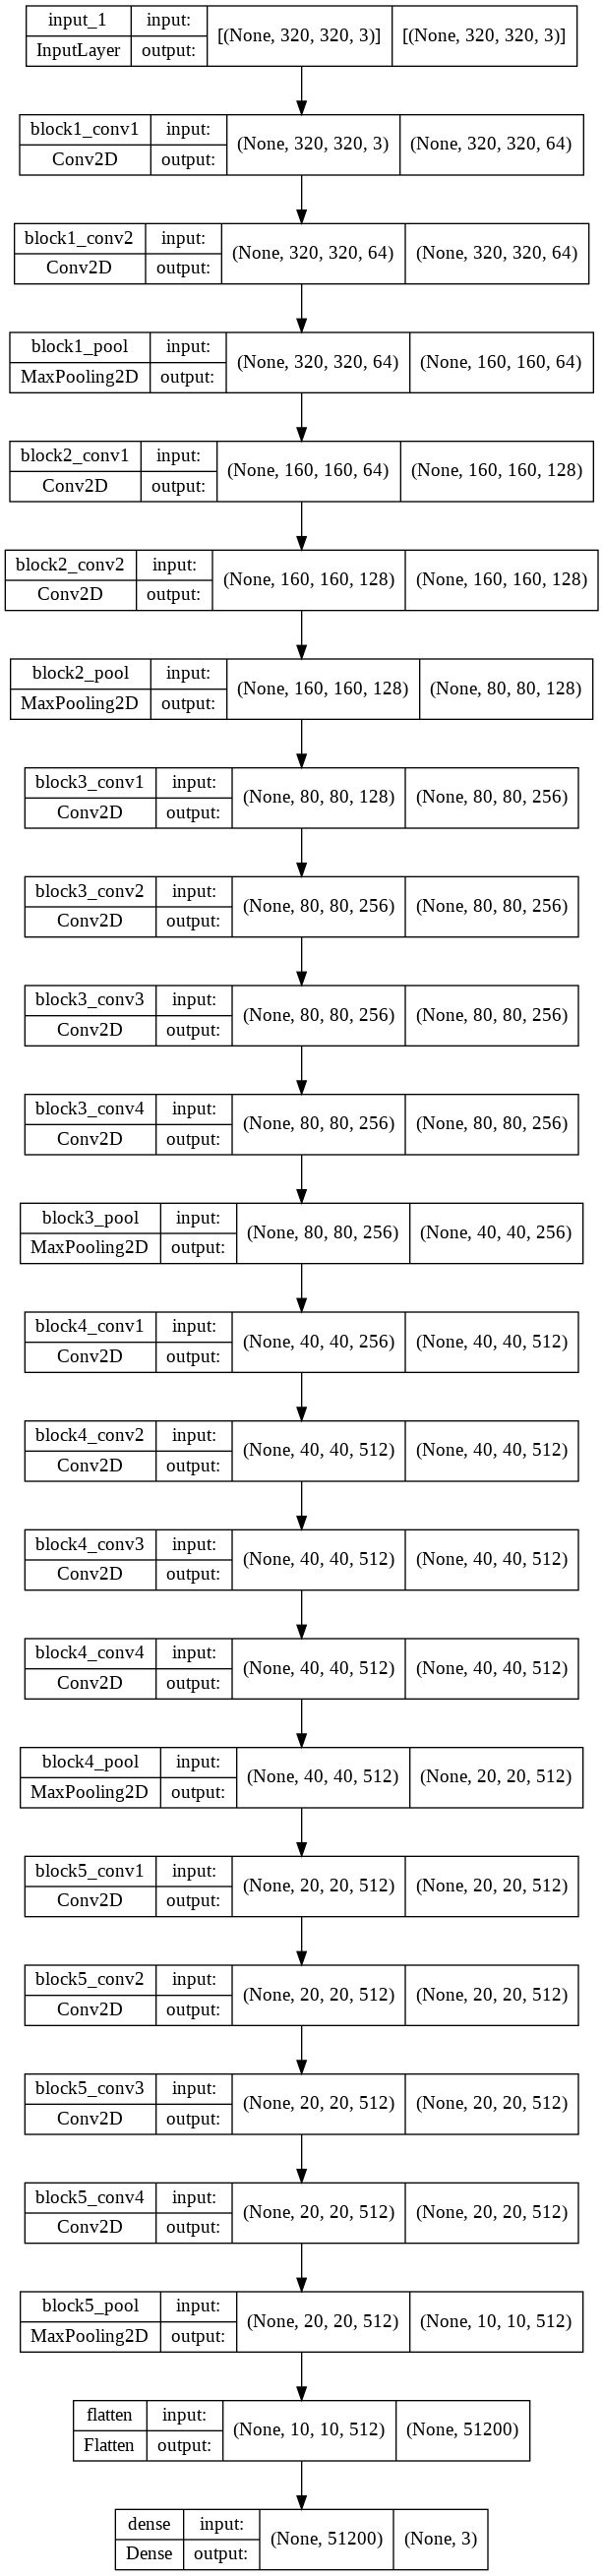

In [16]:
plot_model(model=model, show_shapes=True)

In [17]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 5)

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, callbacks=[early_stop], batch_size = 30,
                    shuffle=True)

Epoch 1/10
107/107 [==============================] - 65s 461ms/step - loss: 0.9749 - accuracy: 0.9530 - val_loss: 0.0373 - val_accuracy: 0.9981
Epoch 2/10
107/107 [==============================] - 57s 539ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 6.5849e-09 - val_accuracy: 1.0000
Epoch 3/10
107/107 [==============================] - 58s 545ms/step - loss: 7.4693e-11 - accuracy: 1.0000 - val_loss: 4.2007e-09 - val_accuracy: 1.0000
Epoch 4/10
107/107 [==============================] - 58s 547ms/step - loss: 3.7346e-11 - accuracy: 1.0000 - val_loss: 4.2007e-09 - val_accuracy: 1.0000
Epoch 5/10
107/107 [==============================] - 58s 545ms/step - loss: 3.7346e-11 - accuracy: 1.0000 - val_loss: 4.2007e-09 - val_accuracy: 1.0000
Epoch 6/10
107/107 [==============================] - 58s 546ms/step - loss: 3.7346e-11 - accuracy: 1.0000 - val_loss: 4.2007e-09 - val_accuracy: 1.0000
Epoch 7/10
107/107 [==============================] - 50s 469ms/step - loss: 3.7346e-11 - accu

In [19]:
model.evaluate(x_test, y_test, batch_size=32)

62/62 [==============================] - 33s 429ms/step - loss: 0.0137 - accuracy: 0.9990


[0.013660715892910957, 0.9989898800849915]

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_pred=np.argmax(y_pred,axis=1)

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       992

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



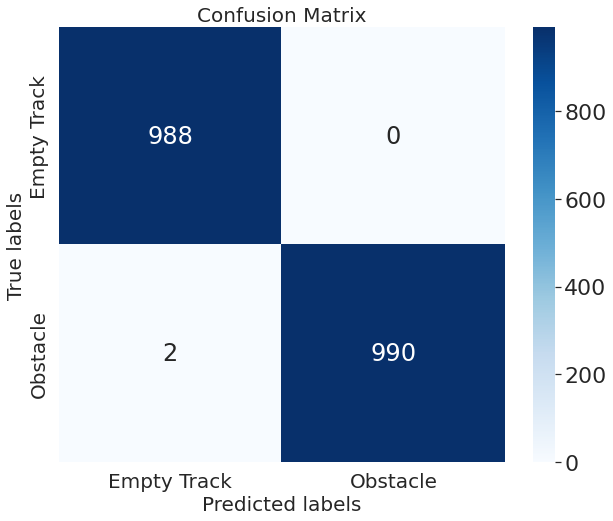

In [27]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20); 
ax.xaxis.set_ticklabels(['Empty Track', 'Obstacle'], fontsize=20); ax.yaxis.set_ticklabels(['Empty Track', 'Obstacle'], fontsize=20);

In [24]:
f1_score(y_test, y_pred, average='micro')

0.998989898989899

In [25]:
recall_score(y_test, y_pred, average='weighted')

0.998989898989899

In [26]:
precision_score(y_test, y_pred, average='micro')

0.998989898989899

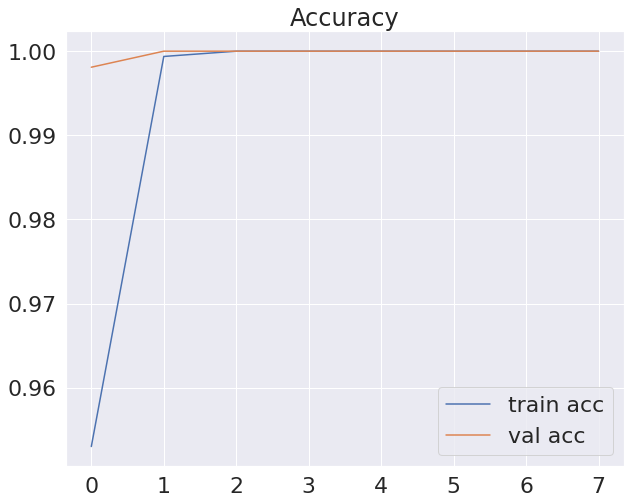

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

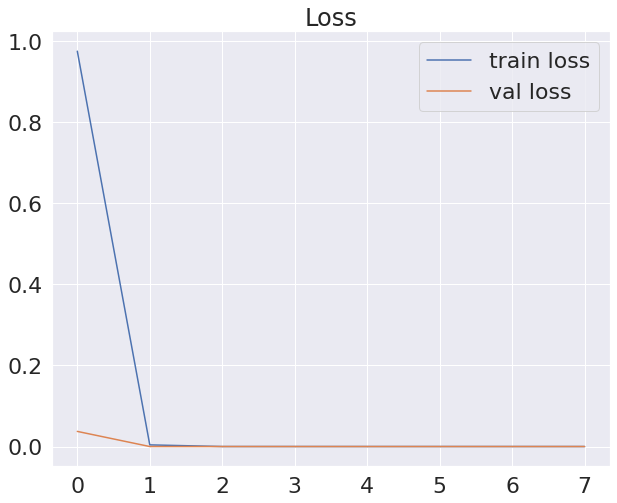

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()